In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 96% 83.0M/86.8M [00:03<00:00, 32.5MB/s]
100% 86.8M/86.8M [00:03<00:00, 28.7MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/brain-tumor-classification-mri.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications import InceptionV3

In [ ]:
conv_base=InceptionV3(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
conv_base.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [ ]:
model=Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 256)               13107456  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 34943652 (133.30 MB)
Trainable params: 34909220 (133.17 MB)
Non-trainable params: 34432 (134.50 KB)
_________________________________________________________________


In [ ]:
conv_base.trainable=False

In [ ]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [ ]:
batch_size=32

train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    '/content/Training',
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator=test_datagen.flow_from_directory(
    '/content/Testing',
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='categorical')

Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit_generator(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    callbacks=[early_stopping])

<ipython-input-15-448e6440a197>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


Epoch 1/25
90/90 [==============================] - 59s 497ms/step - loss: 3.2129 - accuracy: 0.6871 - val_loss: 2.1773 - val_accuracy: 0.5330
Epoch 2/25
90/90 [==============================] - 40s 449ms/step - loss: 0.5220 - accuracy: 0.8261 - val_loss: 1.6239 - val_accuracy: 0.6421
Epoch 3/25
90/90 [==============================] - 42s 464ms/step - loss: 0.5277 - accuracy: 0.8373 - val_loss: 2.2483 - val_accuracy: 0.5914
Epoch 4/25
90/90 [==============================] - 40s 449ms/step - loss: 0.4488 - accuracy: 0.8610 - val_loss: 1.7457 - val_accuracy: 0.6853
Epoch 5/25
90/90 [==============================] - 42s 463ms/step - loss: 0.2829 - accuracy: 0.9045 - val_loss: 1.2735 - val_accuracy: 0.7157
Epoch 6/25
90/90 [==============================] - 40s 449ms/step - loss: 0.2765 - accuracy: 0.8969 - val_loss: 1.2143 - val_accuracy: 0.7487
Epoch 7/25
90/90 [==============================] - 40s 444ms/step - loss: 0.1935 - accuracy: 0.9272 - val_loss: 1.3806 - val_accuracy: 0.7208

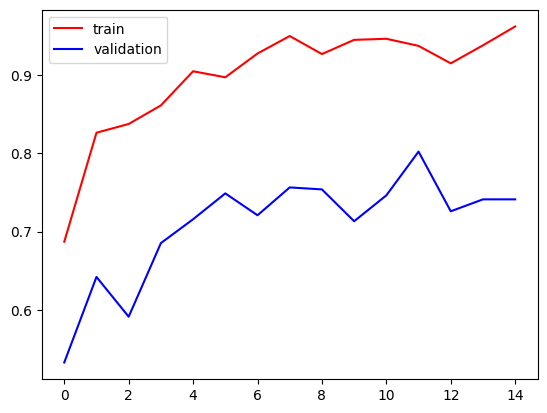

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

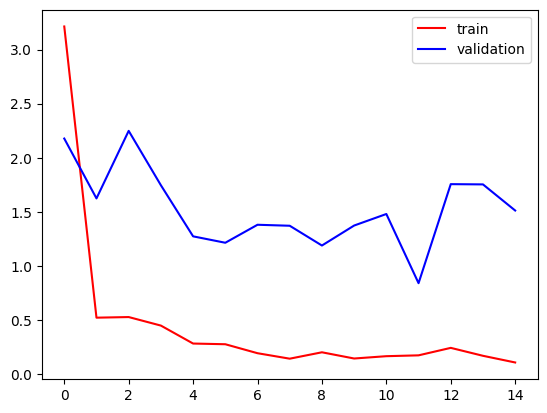

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model.save('brain_tumour.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loss, accuracy = model.evaluate(validation_generator)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

13/13 [==============================] - 1s 92ms/step - loss: 0.8407 - accuracy: 0.8020
Test Loss: 0.8407039642333984
Test Accuracy: 0.8020304441452026


In [ ]:
 validation_generator.class_indices

{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}

In [ ]:
from keras.preprocessing import image
import numpy as np
model = load_model('brain_tumour.h5')

file_path = "/content/Testing/pituitary_tumor/image(15).jpg"

img = image.load_img(file_path, target_size=(224, 224))
x = image.img_to_array(img)
x=x/255
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
preds=np.argmax(preds, axis=1)
if preds == 0:
    print("Glioma Tumor")
elif preds == 1:
    print("Meningioma Tumor")
elif preds == 2:
    print("No Tumor")
else:
    print("Pituitary Tumor")

1/1 [==============================] - 3s 3s/step
Pituitary Tumor


In [ ]:
file_path = "/content/Testing/no_tumor/image(103).jpg"

img = image.load_img(file_path, target_size=(224, 224))
x = image.img_to_array(img)
x=x/255
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
preds=np.argmax(preds, axis=1)
if preds == 0:
    print("Glioma Tumor")
elif preds == 1:
    print("Meningioma Tumor")
elif preds == 2:
    print("No Tumor")
else:
    print("Pituitary Tumor")

1/1 [==============================] - 0s 36ms/step
No Tumor
